## Quantum Fourier Transform


In [1]:
import numpy as np
from numpy import pi

from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

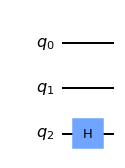

In [2]:
# doing it for a 3 qubit case

qc = QuantumCircuit(3)

qc.h(2)
qc.draw('mpl')

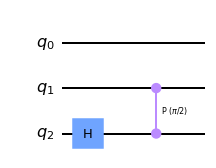

In [3]:
# we want to turn this to extra quarter if qubit 1 is in |1>
# apply the CROT from qubit 1 to to qubit 2
qc.cp(pi/2,1,2)
qc.draw('mpl')

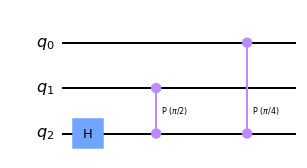

In [4]:
# we want an another eighsths turn if the least significant bit
# 0 has the value |1>
# apply CROT from qubit 2 to qubit 1
qc.cp(pi/4,0,2)
qc.draw('mpl')

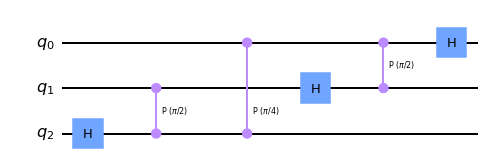

In [5]:
# doing the same for the rest two qubits
qc.h(1)
qc.cp(pi/2,0,1)
qc.h(0)
qc.draw('mpl')

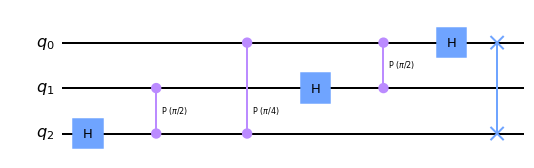

In [6]:
# and then swap the 0 and 2 qubit to complete the QFT
qc.swap(0,2)
qc.draw('mpl')

This is one way to create the QFT circuit, but we can also make a function to make that.

In [7]:
def qft_rotations(circuit,n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(0)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit,n)

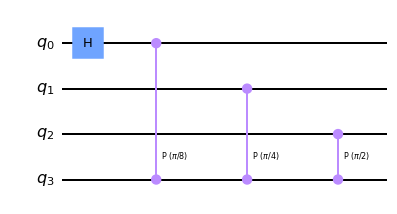

In [9]:
# so 
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

In [13]:
# how scaling works
from qiskit_textbook.widgets import scalable_circuit

In [14]:
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xfb\x00\x00\x01\x08\x08\x06\x00\x00\x00X\x8d]e\x…

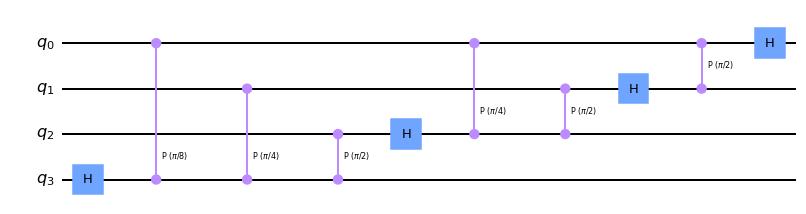

In [17]:
# we can modify the prev function 
def qft_rotations(circuit,n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit,n)
        
    qft_rotations(circuit,n)

qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

In [19]:
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x19\x00\x00\x01\x08\x08\x06\x00\x00\x00\x1a\xcd,…

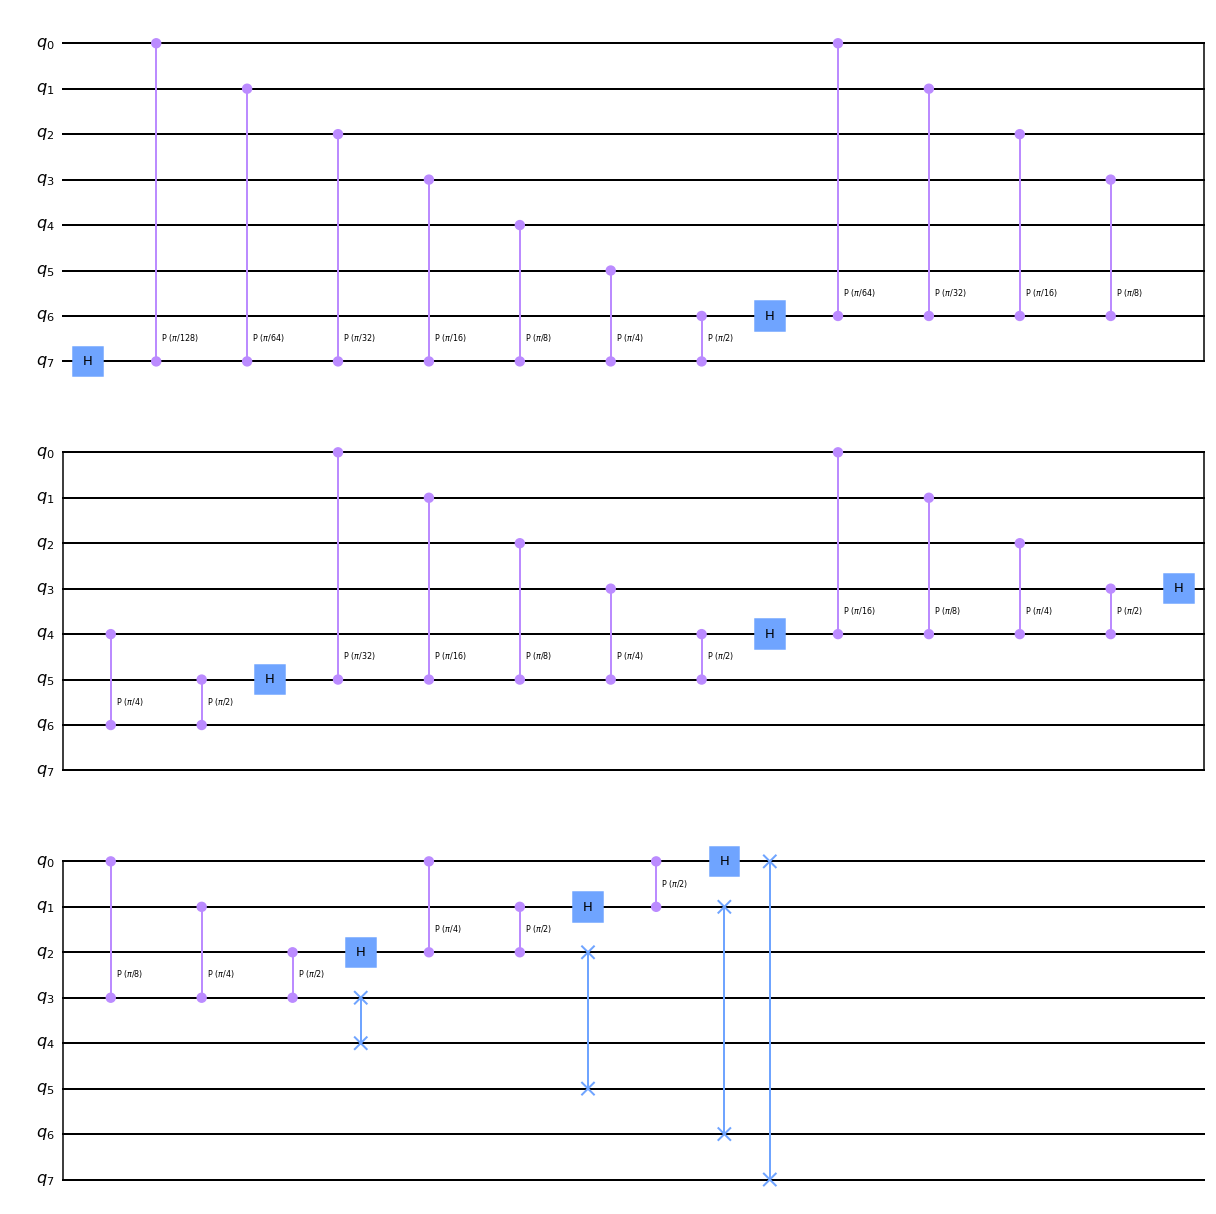

In [22]:
# now adding the swap gates
def swap_registeres(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit,n):
    qft_rotations(circuit,n)
    swap_registeres(circuit,n)
    return circuit


qc =  QuantumCircuit(8)
qft(qc,8)
qc.draw('mpl')

In [23]:
scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04U\x00\x00\x01\x08\x08\x06\x00\x00\x00\x9eK\xcbE\x…

## How the Circuit Works?

In [26]:
bin(7)

'0b111'

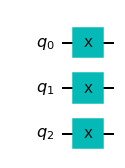

In [30]:
# encode this 
qc = QuantumCircuit(3)

for i in range(3):
    qc.x(i)
    
    
qc.draw('mpl')

C:\Users\Monit Sharma\.conda\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


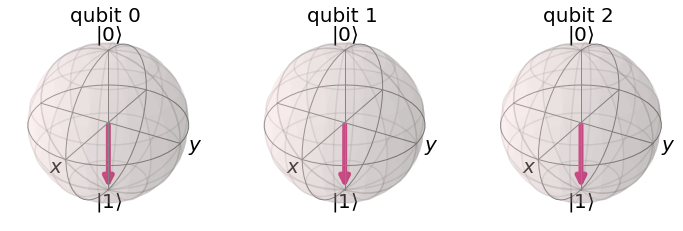

In [32]:
# display in the aer simulator
sim = Aer.get_backend("aer_simulator")

qc_init = qc.copy()

qc_init.save_statevector()

statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

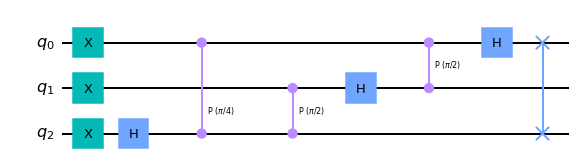

In [33]:
# now call the qft function
qft(qc,3)
qc.draw('mpl')

C:\Users\Monit Sharma\.conda\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


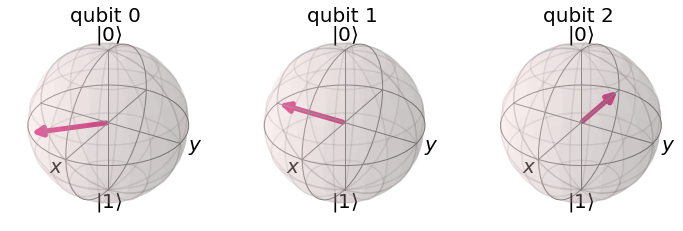

In [44]:
qc.save_statevector()

statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

### Running it on Real Quantum Device

In [58]:
def inverse_qft(circuit,n):
    qft_circ = qft(QuantumCircuit(n), n)
    
    invqft_circuit = qft_circ.inverse()
    
    # add it to first n qubits
    circuit.append(invqft_circuit, circuit.qubits[:n])
    return circuit.decompose()

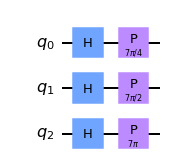

In [51]:
# now do it fo the 7
nqubits = 3
number = 7
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw('mpl')


C:\Users\Monit Sharma\.conda\envs\quantum\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


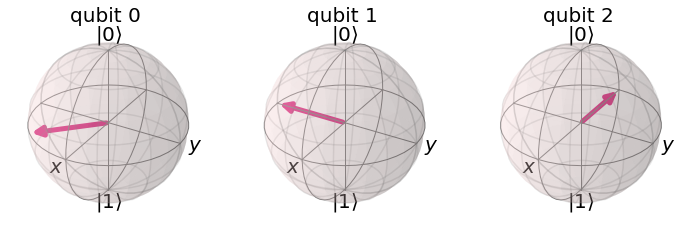

In [52]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

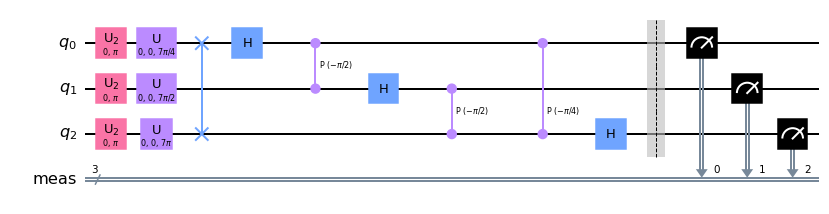

In [59]:
# now the inverse QFT
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw('mpl')

In [60]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [61]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


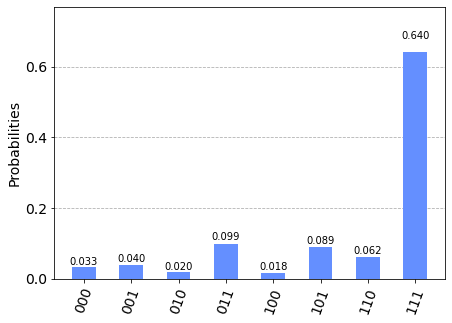

In [62]:
counts = job.result().get_counts()
plot_histogram(counts)